## Part 1: Corpus Analysis

In [1]:
# Import Required Libraries
from bs4 import BeautifulSoup
from nltk.util import ngrams
import nltk
from collections import Counter
import pandas
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist
import re
import string
from IPython.display import Image

### Get the clean data without tags

In [2]:
# Open downloaded file
data = open("wiki_62",'r', encoding='utf').read()

# create soup for getting the contents
soup = BeautifulSoup(data, 'html.parser')

# Removing all the tags from soup. 
processed_clean_data_1 = soup.get_text()

#Test data for couple of initial records/articles
print(processed_clean_data_1[0:80])


Daniel Burley Woolfall

Daniel Burley Woolfall (15 June 1852 – 24 October 1918)


In [3]:
# remove punctuation from each word
def remove_punctuation(words):
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in words]
    return ''.join(stripped)

In [4]:
def remove_special_characters(s):
    # removes special characters with ' '
    stripped = re.sub('[^a-zA-z0-9\s]', '', s)

    # Remove underscore
    stripped = re.sub('_', '', stripped)
    # Change any white space to one space including new line
    stripped = re.sub('\s+', ' ', stripped)

    # Remove start and end white spaces
    stripped = stripped.strip()
    if stripped != '':
        return stripped.lower()

In [5]:
processed_clean_data_2 = remove_special_characters(processed_clean_data_1)
#Test data for couple of initial records/articles
print(processed_clean_data_2[0:80])

daniel burley woolfall daniel burley woolfall 15 june 1852 24 october 1918 was t


In [34]:
processed_clean_data_3 = remove_punctuation(processed_clean_data_2)
#Test data for couple of initial records/articles
print(processed_clean_data_3[0:80000])

daniel burley woolfall daniel burley woolfall 15 june 1852 24 october 1918 was the 2nd president of fifa an english fa administrator from blackburn woolfall was elected as president on 4 june 1906 a key aim during his presidency was to achieve uniform football rules on an international level and he played a prominent role in the drafting of fifas new constitution under woolfall the application of the laws of the game established under the english model became compulsory and a clear definition was made of international matches two years after assuming the presidency he helped to organise the first noteworthy international football competition the 1908 olympic games in london his tenure as president brought the arrival of fifas first noneuropean members in south africa argentina chile and the united states but was interrupted by the outbreak of the first world war woolfalls presidency ended with his death in october 1918 virginia state route 27 state route 27 sr 27 is a freeway in arling

In [7]:
# Get ngrams using ntlk tokenize function
def get_ngrams(data, num):
    n_grams = ngrams(nltk.word_tokenize(data), num)
    return [ ' '.join(grams) for grams in n_grams]

In [8]:
#Stemmer Instance
porter=PorterStemmer()

# method to generate ngrams
def get_ngrams_with_stemming(data, num):    
    tokens = nltk.word_tokenize(data)
    stem_tokens = []
    
    for token in tokens:
        stem_tokens.append(porter.stem(token))    
    
    n_grams = ngrams(stem_tokens, num)
    return [ ' '.join(grams) for grams in n_grams]

## Q1. Get Unigrams

In [9]:
# get unigrams
unigram_list = get_ngrams(processed_clean_data_3, 1)
print(unigram_list[0:10])
total_num_unigrams = len(unigram_list)
print("Total numbers of unigrams:", total_num_unigrams)

['daniel', 'burley', 'woolfall', 'daniel', 'burley', 'woolfall', '15', 'june', '1852', '24']
Total numbers of unigrams: 1331379


#### (a) Mention the total unique unigrams present in the corpus.

In [10]:
unigram_counter = Counter(unigram_list)
print(len(set(unigram_counter)))

75905


#### Answer: Total unique unigrams = 75905

#### (b) Plot the distribution of the unigram frequencies.

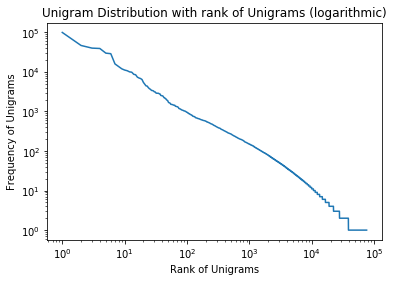

In [11]:
# Sort by count
unigram_counter_sorted_list = unigram_counter.most_common()

unigram_list_counter_keys_in_rank = list(range(1,len(unigram_counter_sorted_list)+1)) # On X axis
unigram_list_counter_keys_names_in_rank = [item[0] for item in unigram_counter_sorted_list] #
unigram_list_counter_values_in_frequency = [item[1] for item in unigram_counter_sorted_list] # On Y axis

plt.plot(unigram_list_counter_keys_in_rank, unigram_list_counter_values_in_frequency, label="All")
plt.xlabel("Rank of Unigrams")
plt.ylabel("Frequency of Unigrams")
plt.title("Unigram Distribution with rank of Unigrams (logarithmic)")
plt.xscale("log")
plt.yscale("log")    
plt.show()

#### (c) How many (most frequent) uni-grams are required to cover the 90% of the complete corpus.

In [12]:
ninety_percent_unigram_count = int(total_num_unigrams * (.9))
print("ninety_percentage_count:", ninety_percent_unigram_count)
counter = 0
most_frequent_counter = 0
for _, value in unigram_counter_sorted_list:   
    if counter >= ninety_percent_unigram_count:
        break
    counter += value    
    most_frequent_counter += 1    
print("(most frequent) uni-grams are required to cover the 90% of the complete corpus:", most_frequent_counter)

ninety_percentage_count: 1198241
(most frequent) uni-grams are required to cover the 90% of the complete corpus: 11927


#### Anwer: (most frequent) uni-grams are required to cover the 90% of the complete corpus: 11927

### Q2. Get Bigrams

In [13]:
# get bigrams
bigram_list = get_ngrams(processed_clean_data_3, 2)
print(bigram_list[0:10])
total_num_bigrams = len(bigram_list)
print("Total numbers of Bigrams:", total_num_bigrams)

['daniel burley', 'burley woolfall', 'woolfall daniel', 'daniel burley', 'burley woolfall', 'woolfall 15', '15 june', 'june 1852', '1852 24', '24 october']
Total numbers of Bigrams: 1331378


#### (a) Mention the total unique unigrams present in the corpus.

In [14]:
bigram_counter = Counter(bigram_list)
print(len(set(bigram_counter)))

608076


#### Answer: Total unique Bigrams = 608076

#### (b) Plot the distribution of the Bigram frequencies.

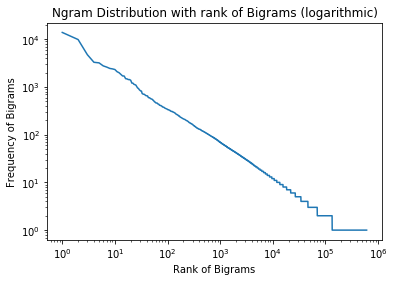

In [15]:
# Sort by count
bigram_counter_sorted_list = bigram_counter.most_common()

bigram_list_counter_keys_in_rank = list(range(1,len(bigram_counter_sorted_list)+1)) # On X axis
bigram_list_counter_keys_names_in_rank = [item[0] for item in bigram_counter_sorted_list] #
bigram_list_counter_values_in_frequency = [item[1] for item in bigram_counter_sorted_list] # On Y axis

plt.plot(bigram_list_counter_keys_in_rank, bigram_list_counter_values_in_frequency, label="All")
plt.xlabel("Rank of Bigrams")
plt.ylabel("Frequency of Bigrams")
plt.title("Ngram Distribution with rank of Bigrams (logarithmic)")
plt.xscale("log")
plt.yscale("log")    
plt.show()

#### (c) How many (most frequent) uni-grams are required to cover the 90% of the complete corpus.

In [16]:
ninety_percent_bigram_count = int(total_num_bigrams * (.9))
print("ninety_percent_bigram_count:", ninety_percent_bigram_count)
counter = 0
most_frequent_counter = 0
for _, value in bigram_counter_sorted_list:   
    if counter >= ninety_percent_bigram_count:
        break
    counter += value    
    most_frequent_counter += 1    
print("(most frequent) Bigrams required to cover the 90% of the complete corpus:", most_frequent_counter)

ninety_percent_bigram_count: 1198240
(most frequent) Bigrams required to cover the 90% of the complete corpus: 474938


#### Anwer: (most frequent) bigrams are required to cover the 90% of the complete corpus: 474938

### Q3. Get Trigrams

In [17]:
# get bigrams
trigram_list = get_ngrams(processed_clean_data_3, 3)
print(trigram_list[0:10])
total_num_trigrams = len(trigram_list)
print("Total numbers of Trigrams:", total_num_trigrams)

['daniel burley woolfall', 'burley woolfall daniel', 'woolfall daniel burley', 'daniel burley woolfall', 'burley woolfall 15', 'woolfall 15 june', '15 june 1852', 'june 1852 24', '1852 24 october', '24 october 1918']
Total numbers of Trigrams: 1331377


#### (a) Mention the total unique trigrams present in the corpus.

In [18]:
trigram_counter = Counter(trigram_list)
print(len(set(trigram_counter)))

1088136


#### Answer: Total unique Bigrams = 1088136

#### (b) Plot the distribution of the Trigram frequencies.

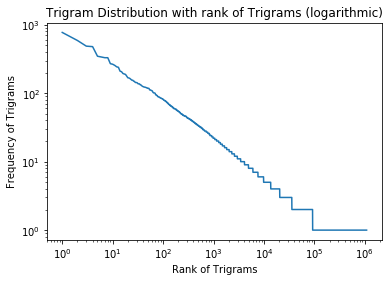

In [19]:
# Sort by count
trigram_counter_sorted_list = trigram_counter.most_common()

trigram_list_counter_keys_in_rank = list(range(1,len(trigram_counter_sorted_list)+1)) # On X axis
trigram_list_counter_keys_names_in_rank = [item[0] for item in trigram_counter_sorted_list] #
trigram_list_counter_values_in_frequency = [item[1] for item in trigram_counter_sorted_list] # On Y axis

plt.plot(trigram_list_counter_keys_in_rank, trigram_list_counter_values_in_frequency, label="All")
plt.xlabel("Rank of Trigrams")
plt.ylabel("Frequency of Trigrams")
plt.title("Trigram Distribution with rank of Trigrams (logarithmic)")
plt.xscale("log")
plt.yscale("log")    
plt.show()

#### (c) How many (most frequent) tri-grams are required to cover the 90% of the complete corpus.

In [20]:
ninety_percent_trigram_count = int(total_num_trigrams * (.9))
print("ninety_percent_trigram_count:", ninety_percent_trigram_count)
counter = 0
most_frequent_counter = 0
for _, value in trigram_counter_sorted_list:   
    if counter >= ninety_percent_trigram_count:
        break
    counter += value    
    most_frequent_counter += 1    
print("(most frequent) Trigrams required to cover the 90% of the complete corpus:", most_frequent_counter)

ninety_percent_trigram_count: 1198239
(most frequent) Trigrams required to cover the 90% of the complete corpus: 954998


#### Anwer: (most frequent) uni-grams are required to cover the 90% of the complete corpus: 954998

### Q4:  Corpus Analysis after performing the stemming process on the tokens.

#### Part A : Unigram Analysis After Stemming

In [21]:
# get unigrams
unigram_list = get_ngrams_with_stemming(processed_clean_data_3, 1)
print(unigram_list[0:10])
total_num_unigrams = len(unigram_list)
print("Total numbers of unigrams after Stemming:", total_num_unigrams)

['daniel', 'burley', 'woolfal', 'daniel', 'burley', 'woolfal', '15', 'june', '1852', '24']
Total numbers of unigrams after Stemming: 1331379


#### (a) Mention the total unique unigrams present in the corpus.

In [22]:
unigram_counter = Counter(unigram_list)
print(len(set(unigram_counter)))

57789


#### Answer: Total unique unigrams after stemming = 57789

#### (b) Plot the distribution of the unigram frequencies.

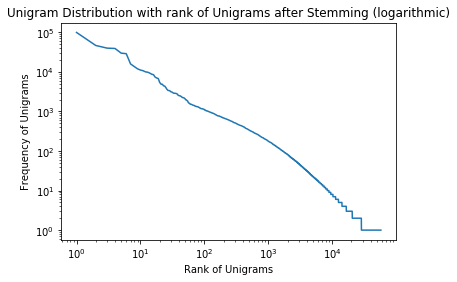

In [23]:
# Sort by count
unigram_counter_sorted_list = unigram_counter.most_common()

unigram_list_counter_keys_in_rank = list(range(1,len(unigram_counter_sorted_list)+1)) # On X axis
unigram_list_counter_keys_names_in_rank = [item[0] for item in unigram_counter_sorted_list] #
unigram_list_counter_values_in_frequency = [item[1] for item in unigram_counter_sorted_list] # On Y axis

plt.plot(unigram_list_counter_keys_in_rank, unigram_list_counter_values_in_frequency, label="All")
plt.xlabel("Rank of Unigrams")
plt.ylabel("Frequency of Unigrams")
plt.title("Unigram Distribution with rank of Unigrams after Stemming (logarithmic)")
plt.xscale("log")
plt.yscale("log")    
plt.show()

#### (c) How many (most frequent) uni-grams are required to cover the 90% of the complete corpus.

In [24]:
ninety_percent_unigram_count = int(total_num_unigrams * (.9))
print("ninety_percentage_count:", ninety_percent_unigram_count)
counter = 0
most_frequent_counter = 0
for _, value in unigram_counter_sorted_list:   
    if counter >= ninety_percent_unigram_count:
        break
    counter += value    
    most_frequent_counter += 1    
print("(most frequent) uni-grams are required to cover the 90% of the complete corpus:", most_frequent_counter)

ninety_percentage_count: 1198241
(most frequent) uni-grams are required to cover the 90% of the complete corpus: 6314


#### Anwer: (most frequent) uni-grams are required to cover the 90% of the complete corpus: 6314

#### Part B : Bigram Analysis After Stemming

In [25]:
# get Bigrams
bigram_list = get_ngrams_with_stemming(processed_clean_data_3, 2)
print(bigram_list[0:10])
total_num_bigrams = len(bigram_list)
print("Total numbers of bigrams after Stemming:", total_num_bigrams)

['daniel burley', 'burley woolfal', 'woolfal daniel', 'daniel burley', 'burley woolfal', 'woolfal 15', '15 june', 'june 1852', '1852 24', '24 octob']
Total numbers of bigrams after Stemming: 1331378


#### (a) Mention the total unique bigrams present in the corpus after stemming.

In [26]:
bigram_counter = Counter(bigram_list)
print(len(set(bigram_counter)))

553370


#### (b) Plot the distribution of the bigram frequencies after stemming. 

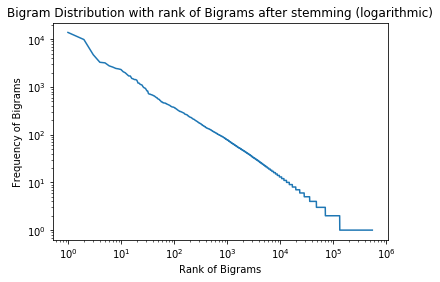

In [27]:
# Sort by count
bigram_counter_sorted_list = bigram_counter.most_common()

bigram_list_counter_keys_in_rank = list(range(1,len(bigram_counter_sorted_list)+1)) # On X axis
bigram_list_counter_keys_names_in_rank = [item[0] for item in bigram_counter_sorted_list] #
bigram_list_counter_values_in_frequency = [item[1] for item in bigram_counter_sorted_list] # On Y axis

plt.plot(bigram_list_counter_keys_in_rank, bigram_list_counter_values_in_frequency, label="All")
plt.xlabel("Rank of Bigrams")
plt.ylabel("Frequency of Bigrams")
plt.title("Bigram Distribution with rank of Bigrams after stemming (logarithmic)")
plt.xscale("log")
plt.yscale("log")    
plt.show()

#### (c) How many (most frequent) bi-grams are required to cover the 90% of the complete corpus after stemming.

In [28]:
ninety_percent_bigram_count = int(total_num_bigrams * (.9))
print("ninety_percent_bigram_count:", ninety_percent_bigram_count)
counter = 0
most_frequent_counter = 0
for _, value in bigram_counter_sorted_list:   
    if counter >= ninety_percent_bigram_count:
        break
    counter += value    
    most_frequent_counter += 1    
print("(most frequent) Bigrams required to cover the 90% of the complete corpus:", most_frequent_counter)

ninety_percent_bigram_count: 1198240
(most frequent) Bigrams required to cover the 90% of the complete corpus: 420232


#### Anwer: (most frequent) bigrams are required to cover the 90% of the complete corpus after stemming: 420232

#### Part C : Trigram Analysis after stemming

In [29]:
# get trigrams after stemming
trigram_list = get_ngrams_with_stemming(processed_clean_data_3, 3)
print(trigram_list[0:10])
total_num_trigrams = len(trigram_list)
print("Total numbers of Trigrams:", total_num_trigrams)

['daniel burley woolfal', 'burley woolfal daniel', 'woolfal daniel burley', 'daniel burley woolfal', 'burley woolfal 15', 'woolfal 15 june', '15 june 1852', 'june 1852 24', '1852 24 octob', '24 octob 1918']
Total numbers of Trigrams: 1331377


#### (a) Mention the total unique trigrams present in the corpus after stemming.

In [30]:
trigram_counter = Counter(trigram_list)
print(len(set(trigram_counter)))

1067588


#### Answer: Total unique Trigrams = 1067588

#### (b) Plot the distribution of the Trigram frequencies after stemming.

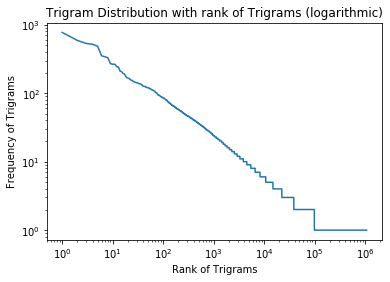

In [31]:
# Sort by count
trigram_counter_sorted_list = trigram_counter.most_common()

trigram_list_counter_keys_in_rank = list(range(1,len(trigram_counter_sorted_list)+1)) # On X axis
trigram_list_counter_keys_names_in_rank = [item[0] for item in trigram_counter_sorted_list] #
trigram_list_counter_values_in_frequency = [item[1] for item in trigram_counter_sorted_list] # On Y axis

plt.plot(trigram_list_counter_keys_in_rank, trigram_list_counter_values_in_frequency, label="All")
plt.xlabel("Rank of Trigrams")
plt.ylabel("Frequency of Trigrams")
plt.title("Trigram Distribution with rank of Trigrams (logarithmic)")
plt.xscale("log")
plt.yscale("log")    
plt.show()

#### (c) How many (most frequent) tri-grams are required to cover the 90% of the complete corpus after stemming.

In [32]:
ninety_percent_trigram_count = int(total_num_trigrams * (.9))
print("ninety_percent_trigram_count:", ninety_percent_trigram_count)
counter = 0
most_frequent_counter = 0
for _, value in trigram_counter_sorted_list:   
    if counter >= ninety_percent_trigram_count:
        break
    counter += value    
    most_frequent_counter += 1    
print("(most frequent) Trigrams required to cover the 90% of the complete corpus:", most_frequent_counter)

ninety_percent_trigram_count: 1198239
(most frequent) Trigrams required to cover the 90% of the complete corpus: 934450


#### Anwer: (most frequent) uni-grams are required to cover the 90% of the complete corpus after stemming: 934450

### Q5 Briefly summarize and discuss the frequency distributions obtained in Q1 to Q4. Do these distributions approximately follow Zipf's law?

For all three cases:
 1. Unigram
 2. Bigram
 3. Trigram
 
We can see from frequency distribution plots which follows a negative linear relation as per the frequency values. This implies that all frequency distributions follows Zipf's law. 

Zipf's law is most easily observed by plotting the data on a log-log graph, with the axes being log (rank order) and log (frequency). For example, the word "the" (as described above) appear at x = log(1), y = log(value). It is also possible to plot reciprocal rank against frequency or reciprocal frequency or interword interval against rank. The data plots conform to Zipf's law to the extent that the plot is linear.

### Q6. What library you used for tokenization and stemming? What were the underlying algorithms used by the library for these tasks? 

Following Libraries are used for tokenization and stemming
1. NTLK
2. PortStemeer(NLTK)

The Porter stemming algorithm (or ‘Porter stemmer’) is a process for removing the commoner morphological and inflexional endings from words in English. Its main use is as part of a term normalisation process that is usually done when setting up Information Retrieval systems.

### Q7. Report three examples based on your observation, where the tool used for tokenization did not tokenize the character sequence properly. 

Following three words did not tokenize properly or as expected:
1. ','
2. '.'
3. '24'